In [1]:
from sklearn.linear_model.passive_aggressive import PassiveAggressiveClassifier
from skmultiflow.core.pipeline import Pipeline
from skmultiflow.data.file_stream import FileStream
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
%matplotlib notebook

/home/ben/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.passive_aggressive module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


    This demo shows how to produce a prequential evaluation.
    
    The first thing needed is a stream. For this case we use a file stream 
    which gets its samples from the sea_big.csv file.
    
    Then we need to setup a classifier, which in this case is an instance 
    of sklearn's PassiveAggressiveClassifier. Then, optionally we create a 
    pipeline structure, initialized on that classifier.
    
    The evaluation is then run.

In [2]:
# Setup the File Stream
stream = FileStream("https://raw.githubusercontent.com/scikit-multiflow/streaming-datasets/"
                     "master/sea_big.csv")

In [5]:
# Setup classifier
classifier = PassiveAggressiveClassifier()

In [6]:
# Setup the pipeline
pipe = Pipeline([('Classifier', classifier)])

In [7]:
evaluator = EvaluatePrequential(pretrain_size=200, max_samples=20000, batch_size=1, n_wait=100, max_time=1000,
                                output_file='test_prequential.csv', show_plot=True,
                                metrics=['kappa', 'kappa_t'])

<IPython.core.display.Javascript object>


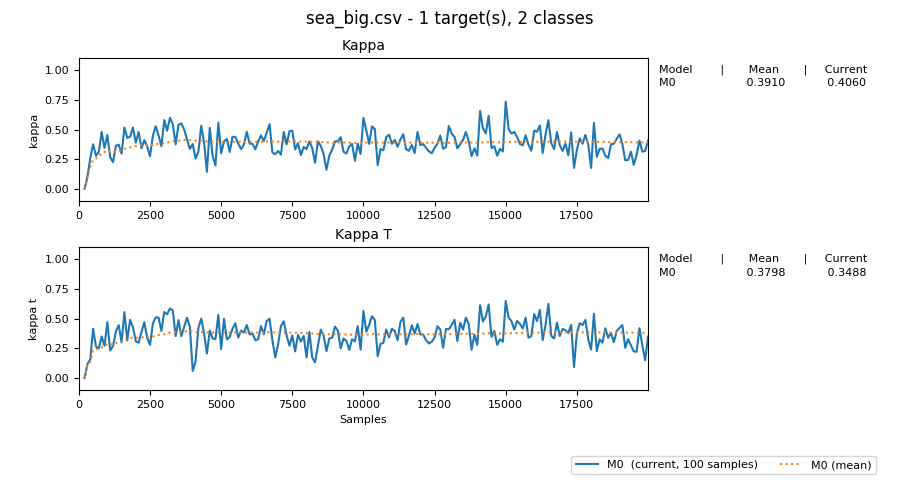

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [13.23s]
Processed samples: 20000
Mean performance:
M0 - Kappa        : 0.3910
M0 - Kappa T      : 0.3798


[Pipeline(steps=[('Classifier',
                  PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                             early_stopping=False, fit_intercept=True,
                             loss='hinge', max_iter=1000, n_iter_no_change=5,
                             n_jobs=None, random_state=None, shuffle=True,
                             tol=0.001, validation_fraction=0.1, verbose=0,
                             warm_start=False))])]

In [8]:
# Evaluate
evaluator.evaluate(stream=stream, model=pipe)